In [1]:
import random

In [2]:
def kth_smallest_num(nums, k):
    """Finds the kth smallest number.
    
        Parameters:
        nums (list): The list of numbers to search through.
        k (int): the index of the smallest number if the list was sorted.
        
        Returns:
        num (float): The kth smallest number."""
    split_index = partition(nums, 0, len(nums) - 1)

    if (len(nums) == 1):
        return nums[0]
    elif (split_index >= k - 1):
        return kth_smallest_num(nums[:split_index + 1], k) #recursively call left sub-array
    elif (split_index < k - 1):
        return kth_smallest_num(nums[split_index + 1:], k - split_index - 1) #recursively call right sub-array
    




In [3]:
def partition(nums, start_index, end_index):
    randNum = random.randint(0, len(nums) - 1)
    partitioner = nums[randNum]
    nums[0], nums[randNum] = nums[randNum], nums[0]
    i = start_index - 1
    j = end_index + 1
    while True:
        i = i + 1
        j = j - 1
        while(nums[j] > partitioner): #keeps going to find value to the right of partitioner that is less than the partitioner
            j = j - 1
        while(nums[i] < partitioner): #keeps going to find value to the left of partitioner that is greater than the partitioner
            i = i + 1
        if i < j:
            nums[i], nums[j] = nums[j], nums[i]
        else: # partitioning is complete, returns the index that divides the list into two halves
            return j

In [4]:
def test_kth_smallest_num():
    # k =1 means the smallest, k cannot have a value of 0.

    #tests that it works on greatest value in array
    nums = [5, 8, 12, 20, 7, 1, 3]
    k = len(nums)
    assert kth_smallest_num(nums, k) == 20

    #tests that it works on an array with duplicate value
    nums1 = [3,1,0,1]
    k = 1 
    assert kth_smallest_num(nums1, k) == 0
    k = 2
    assert kth_smallest_num(nums1, k) == 1
    k = 3
    assert kth_smallest_num(nums1, k ) == 1

    #tests that it works with an array with only one element
    nums2 = [0]
    k = 1
    assert kth_smallest_num(nums2, k) == 0
    
    #tests that it works on a duplicate greatest value in array
    nums3 = [1,2,3,4,5,5]
    k = len(nums3)
    assert kth_smallest_num(nums3, k) == 5 

In [5]:
test_kth_smallest_num()

## Test Cases
| Test Case                                    | Expected Answer | Answer from Algorithm |
|----------------------------------------------|-----------------|-----------------------|
| nums = [5, 8, 12, 20, 7, 1, 3] k = len(nums) | 20              | 20                    |
| nums1 = [3,1,0,1] k = 1                      | 0               | 0                     |
| nums1 = [3,1,0,1] k = 2                      | 1               | 1                     |
| nums1 = [3,1,0,1] k = 3                      | 1               | 1                     |
| nums2 = [0] k = 1                            | 0               | 0                     |
| nums3 = [1, 2, 3, 4, 5, 5] k = len(nums3)    | 5               | 5                     |

## Benchmarking

In [6]:
import time
import matplotlib.pyplot as plt

In [7]:
def sort(nums, k):
    nums.sort()
    return nums[k - 1]

In [8]:
def test_sort():
    # k =1 means the smallest, k cannot have a value of 0.

    #tests that it works on greatest value in array
    nums = [5, 8, 12, 20, 7, 1, 3]
    k = len(nums)
    assert kth_smallest_num(nums, k) == 20

    #tests that it works on an array with duplicate value
    nums1 = [3,1,0,1]
    k = 1 
    assert kth_smallest_num(nums1, k) == 0
    k = 2
    assert kth_smallest_num(nums1, k) == 1
    k = 3
    assert kth_smallest_num(nums1, k ) == 1

    #tests that it works with an array with only one element
    nums2 = [0]
    k = 1
    assert kth_smallest_num(nums2, k) == 0
    
    #tests that it works on a duplicate greatest value in array
    nums3 = [1,2,3,4,5,5]
    k = len(nums3)
    assert kth_smallest_num(nums3, k) == 5 

In [9]:
test_sort()

In [10]:
kth_smallest_times = []
tim_sort_times = []
list_sizes = [100000, 200000, 300000, 500000, 1000000, 2000000, 3000000, 5000000, 10000000]

In [11]:
def generate_list(size):
    return [random.randint(1, 100) for _ in range(size)]

In [12]:
def benchmark_helper(method, input_list):
    temp_list = input_list.copy()
    start_time = time.perf_counter()
    method(temp_list, k = 4)
    end_time = time.perf_counter()
    elapsed_time = end_time - start_time
        
    return elapsed_time

In [13]:
def benchmark(method, list_sizes):
    elapsed_times = []
    
    for size in list_sizes:
        elapsed_times.append(benchmark_helper(method, generate_list(size)))
        
    return elapsed_times

In [14]:
kth_smallest_num_times = benchmark(kth_smallest_num, list_sizes)
tim_sort_times = benchmark(sort, list_sizes)

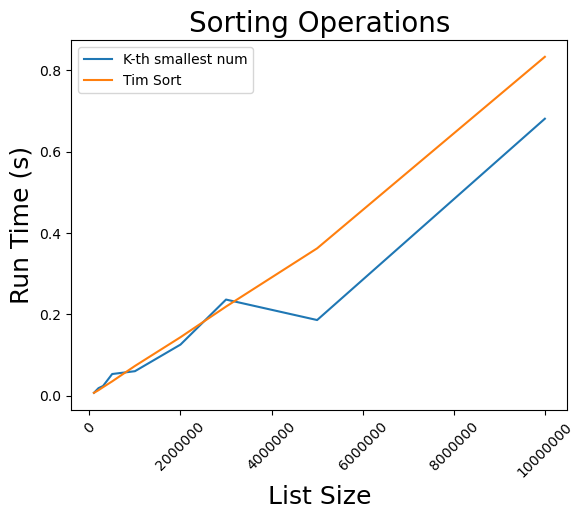

In [15]:
plt.plot(list_sizes, kth_smallest_num_times, label="K-th smallest num")
plt.plot(list_sizes, tim_sort_times, label="Tim Sort")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Run Time (s)", fontsize=18)
plt.title("Sorting Operations", fontsize=20)
plt.legend()
plt.ticklabel_format(style='plain')
plt.xticks(rotation = 45)
plt.show()

## Calculating Linear Regression

In [ ]:
from scipy.stats import linregress
import numpy as np
m1, b1, _, _, _ = linregress(np.log(list_sizes), np.log(kth_smallest_num_times))
m2, b2, _, _, _ = linregress(np.log(list_sizes), np.log(tim_sort_times))
print(f"Slope of the runtime for our K-th smallest number algorithm is: {m1} which is approximately linear.")
print(f"Slope of the runtime for the K-th smallest using Timsort sorting method is: {m2} which is approximately linear.")

Slope of the runtime for our K-th smallest number algorithm is: 0.9082783033510209 which is approximately linear.
Slope of the runtime for the K-th smallest using Timsort sorting method is: 1.0387448514279327 which is approximately linear.
